# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
medical = pd.read_csv('C:/Users/USUARIO/Escritorio/GitHub Repository/1750862181_Frequentist_Inference_Case_Study_-_Part_B/Frequentist Inference Case Study - Part B/insurance2.csv')

In [10]:
medical.shape

(1338, 8)

In [20]:
print(medical.head())
print(len(medical))

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1
1338


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

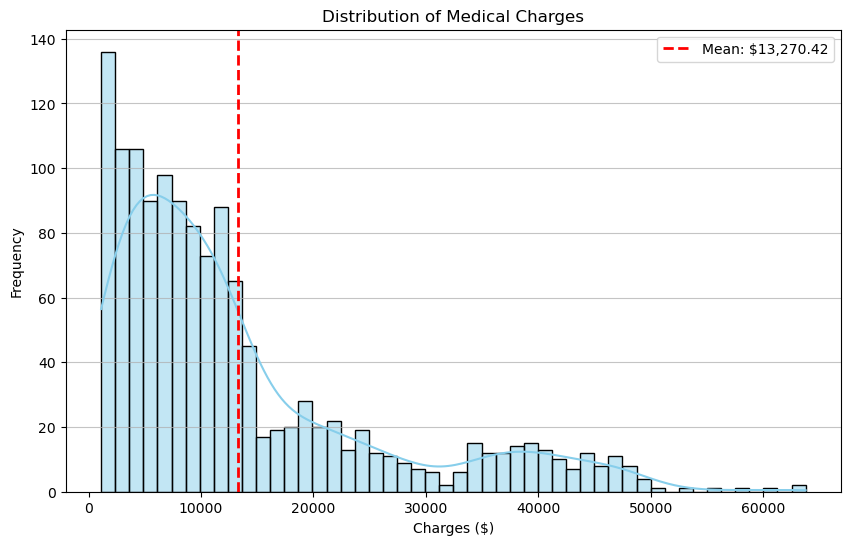

Mean of medical charges: $13,270.42
Standard deviation of medical charges: $12,105.48


In [12]:
# --- Plot the histogram of 'charges' ---
plt.figure(figsize=(10, 6))
sns.histplot(medical['charges'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(medical['charges'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: ${medical["charges"].mean():,.2f}')
plt.legend()
plt.show()

# --- Calculate the mean and standard deviation of 'charges' ---
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])

print(f"Mean of medical charges: ${charges_mean:,.2f}")
print(f"Standard deviation of medical charges: ${charges_std:,.2f}")

### Appropriateness of Mean and Standard Deviation for Medical Charges

The histogram of medical charges reveals a **highly right-skewed distribution**. This means the bulk of the charges are at the lower end, with a long tail extending to significantly higher values.

Given this distribution:

* **Mean ($13,270.42$):**
    * The mean is significantly influenced by the high, outlying charges, pulling its value towards the right of the distribution's peak.
    * **Implication:** It may **not accurately represent the 'typical' or 'most common' charge** for a patient, as the majority of charges are likely lower than the mean.

* **Standard Deviation ($12,105.48$):**
    * The large standard deviation indicates a **high degree of variability** in medical charges, consistent with the wide spread observed in the histogram.
    * **Implication:** Due to the severe skewness, using the standard deviation to define a 'typical range' around the mean (e.g., mean $\pm$ 1 standard deviation) is **not appropriate** as it would yield unrealistic (e.g., negative) charge values.

**In Summary:**

While the mean and standard deviation are mathematically correct, they are **not the most robust or representative summary statistics** for this highly skewed data.

* For **central tendency**, the **median** would offer a more accurate reflection of the 'typical' charge.
* For **variability**, **percentiles** or the **Interquartile Range (IQR)** would provide a clearer picture of the data's spread.



__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
The administrator's concern is whether the **actual average charge ($\mu$)** has fallen below $12,000. Our sample data can address this due to:

1.  **Random Sample Assumption:** The data is assumed to be a random sample, making it representative of the entire hospital's charges.
2.  **Central Limit Theorem (CLT):** Despite the individual charge data being highly skewed, our large sample size (n ≈ 1338) ensures that the **sampling distribution of the sample mean ($\bar{x}$)** will be approximately normal. This normality is key for using parametric tests.

---

The **most appropriate frequentist test** for this question is a **t-test**.

**Why a t-test?**

* We're testing a hypothesis about a **single population mean ($\mu$)**.
* The **population standard deviation ($\sigma$) is unknown**, so we must estimate it using the sample standard deviation ($s$). The t-test accounts for this added uncertainty.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

* The concern is whether the charge has fallen *below* a threshold, making it a **one-tailed (left-tailed) test**.

**Hypotheses:**

***Null Hypothesis ($H_0$):***
*  $\mu \ge$ 12000 (The actual average charge is $12,000 or more.)

***Alternative Hypothesis ($H_1$):***

* $\mu$ < 12000 (The actual average charge has fallen below $12,000.)

In [16]:
# Extract the 'charges' data
charges = medical['charges']

# --- Calculate sample statistics ---
sample_mean = np.mean(charges)
sample_std = np.std(charges, ddof=1) # Use ddof=1 for sample standard deviation
sample_size = len(charges)
degrees_of_freedom = sample_size - 1

print(f"Sample Mean (x̄): ${sample_mean:,.2f}")
print(f"Sample Standard Deviation (s): ${sample_std:,.2f}")
print(f"Sample Size (n): {sample_size}")
print(f"Degrees of Freedom (df): {degrees_of_freedom}")




Sample Mean (x̄): $13,270.42
Sample Standard Deviation (s): $12,110.01
Sample Size (n): 1338
Degrees of Freedom (df): 1337


In [17]:
# --- Calculate the critical t-value for a 95% Confidence Interval ---
# For a 95% CI (alpha=0.05) and a two-sided interval, we need the t-value
# that leaves 0.025 in each tail.
alpha = 0.05
critical_t_value = t.ppf(1 - alpha/2, degrees_of_freedom)

print(f"\nCritical t-value for 95% CI: {critical_t_value:.3f}")

# --- Calculate the Margin of Error (ME) ---
standard_error = sample_std / np.sqrt(sample_size)
margin_of_error = critical_t_value * standard_error

print(f"Standard Error of the Mean (SE): ${standard_error:,.2f}")
print(f"Margin of Error (ME): ${margin_of_error:,.2f}")

# --- Calculate the 95% Confidence Interval (CI) ---
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

print(f"\n95% Confidence Interval for the Mean: (${confidence_interval_lower:,.2f}, ${confidence_interval_upper:,.2f})")


Critical t-value for 95% CI: 1.962
Standard Error of the Mean (SE): $331.07
Margin of Error (ME): $649.47

95% Confidence Interval for the Mean: ($12,620.95, $13,919.89)


The entire confidence interval is above $12,000:

We are 95% confident the true average charge is above $12,000.

The administrator should not be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [33]:
from scipy.stats import ttest_ind 

In [34]:
# Separate the charges into two groups
insured_charges = medical[medical['insuranceclaim'] == 1]['charges']
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges']

# --- Manual Calculation ---

# 1. Calculate sample statistics for each group
n_insured = len(insured_charges)
n_uninsured = len(uninsured_charges)

mean_insured = np.mean(insured_charges)
mean_uninsured = np.mean(uninsured_charges)

std_insured = np.std(insured_charges, ddof=1)    # Use ddof=1 for sample standard deviation
std_uninsured = np.std(uninsured_charges, ddof=1) # Use ddof=1 for sample standard deviation

print("--- Sample Statistics ---")
print(f"Insured Group: n={n_insured}, Mean=${mean_insured:,.2f}, Std=${std_insured:,.2f}")
print(f"Uninsured Group: n={n_uninsured}, Mean=${mean_uninsured:,.2f}, Std=${std_uninsured:,.2f}")



--- Sample Statistics ---
Insured Group: n=783, Mean=$16,423.93, Std=$14,045.93
Uninsured Group: n=555, Mean=$8,821.42, Std=$6,446.51


In [35]:
# 2. Calculate the pooled standard deviation (sp)
# sp = sqrt[ ((n0-1)*s0^2 + (n1-1)*s1^2) / (n0 + n1 - 2) ]
numerator_sp = (n_insured - 1) * (std_insured**2) + (n_uninsured - 1) * (std_uninsured**2)
denominator_sp = n_insured + n_uninsured - 2
pooled_std = np.sqrt(numerator_sp / denominator_sp)

print(f"\nPooled Standard Deviation (sp): ${pooled_std:,.2f}")

# 3. Calculate the t-test statistic
# t = (xbar0 - xbar1) / (sp * sqrt(1/n0 + 1/n1))
t_statistic_manual = (mean_insured - mean_uninsured) / (pooled_std * np.sqrt(1/n_insured + 1/n_uninsured))

print(f"\nManual t-statistic: {t_statistic_manual:.4f}")

# 4. Calculate the p-value (two-tailed)
# Degrees of freedom for pooled t-test
df = n_insured + n_uninsured - 2

# For a two-tailed test, the p-value is 2 * P(T > |t_statistic|)
p_value_manual = 2 * t.sf(abs(t_statistic_manual), df)

print(f"Manual p-value: {p_value_manual:.4f}")


Pooled Standard Deviation (sp): $11,520.03

Manual t-statistic: 11.8933
Manual p-value: 0.0000


In [36]:
# --- Using scipy.stats.ttest_ind ---

print("\n--- SciPy's ttest_ind Results ---")
# ttest_ind returns (t-statistic, p-value)
# We set equal_var=True for the pooled (independent) t-test
t_statistic_scipy, p_value_scipy = ttest_ind(insured_charges, uninsured_charges, equal_var=True)

print(f"SciPy t-statistic: {t_statistic_scipy:.4f}")
print(f"SciPy p-value: {p_value_scipy:.4f}")


print("\n--- Conclution ---")
print(f"Are manual and SciPy t-statistics and p-values are approximately equal")



--- SciPy's ttest_ind Results ---
SciPy t-statistic: 11.8933
SciPy p-value: 0.0000

--- Conclution ---
Are manual and SciPy t-statistics and p-values are approximately equal


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__



**No**, you won't find a direct `ztest_1samp` or `ztest_ind` function in `scipy.stats` for samples.

**Why?**

* A **Z-test** requires knowing the **true population standard deviation ($\sigma$)**.
* In real-world problems with a **sample**, $\sigma$ is almost always **unknown**.
* The **t-test** (like `ttest_1samp` or `ttest_ind`) is designed exactly for this common situation where you only have the **sample standard deviation ($s$)** to estimate $\sigma$. It accounts for that extra uncertainty.

So, the t-test is the more practical and commonly used statistical test in these scenarios.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test